<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2024-12-10 16:39:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.4MB/s    in 2.7s    

2024-12-10 16:39:11 (55.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


In [5]:
##Write your code here
# Clean the data (ensure that JobSat is numeric and there are no NaN values)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['Age', 'SOPartFreq', 'JobSat'])

# Convert 'Age' to numerical values if needed
age_groups = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}
df['Age_numeric'] = df['Age'].map(age_groups)

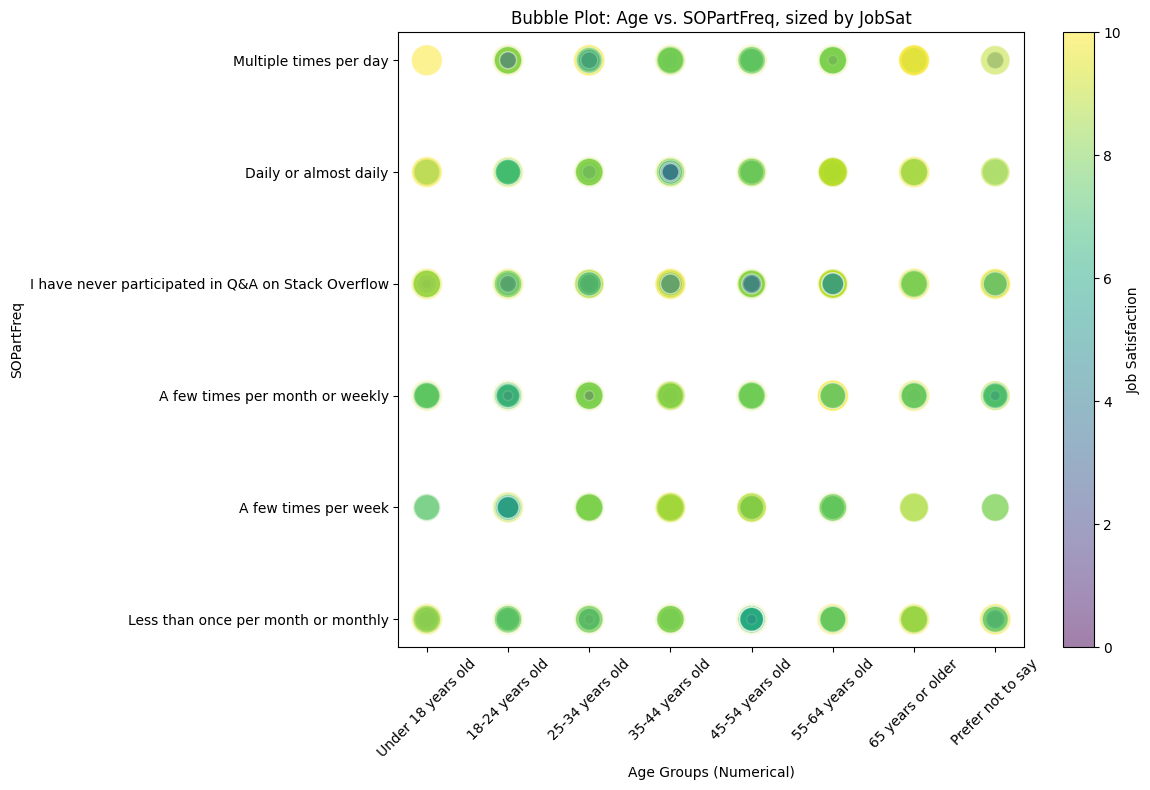

In [6]:
# Ensure no NaN values exist before mapping
df['Age'] = df['Age'].fillna('Unknown')
df['Age_numeric'] = df['Age'].map(age_groups)

# Check if there are any invalid or unknown age groups
if df['Age_numeric'].isna().any():
    print("Some age groups are invalid or missing, these rows will be dropped.")
    df = df.dropna(subset=['Age_numeric'])

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot the bubble plot
plt.scatter(
    x=df['Age_numeric'],  # Age on x-axis
    y=df['SOPartFreq'],   # SOPartFreq on y-axis
    s=df['JobSat'] * 50,  # Bubble size based on JobSat (scaled for visibility)
    alpha=0.5,            # Transparency of bubbles
    c=df['JobSat'],       # Color by JobSat
    cmap='viridis',       # Color map
    edgecolors='w',       # White edges for bubbles
)

# Add labels and title
plt.title('Bubble Plot: Age vs. SOPartFreq, sized by JobSat')
plt.xlabel('Age Groups (Numerical)')
plt.ylabel('SOPartFreq')
plt.xticks(ticks=list(age_groups.values()), labels=list(age_groups.keys()), rotation=45)

# Show the plot
plt.colorbar(label='Job Satisfaction')  # Add a color bar to show the scale of JobSat
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


In [7]:
##Write your code here
# Clean the data (ensure that the columns are numeric)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows with missing values in the relevant columns
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat', 'Age'])

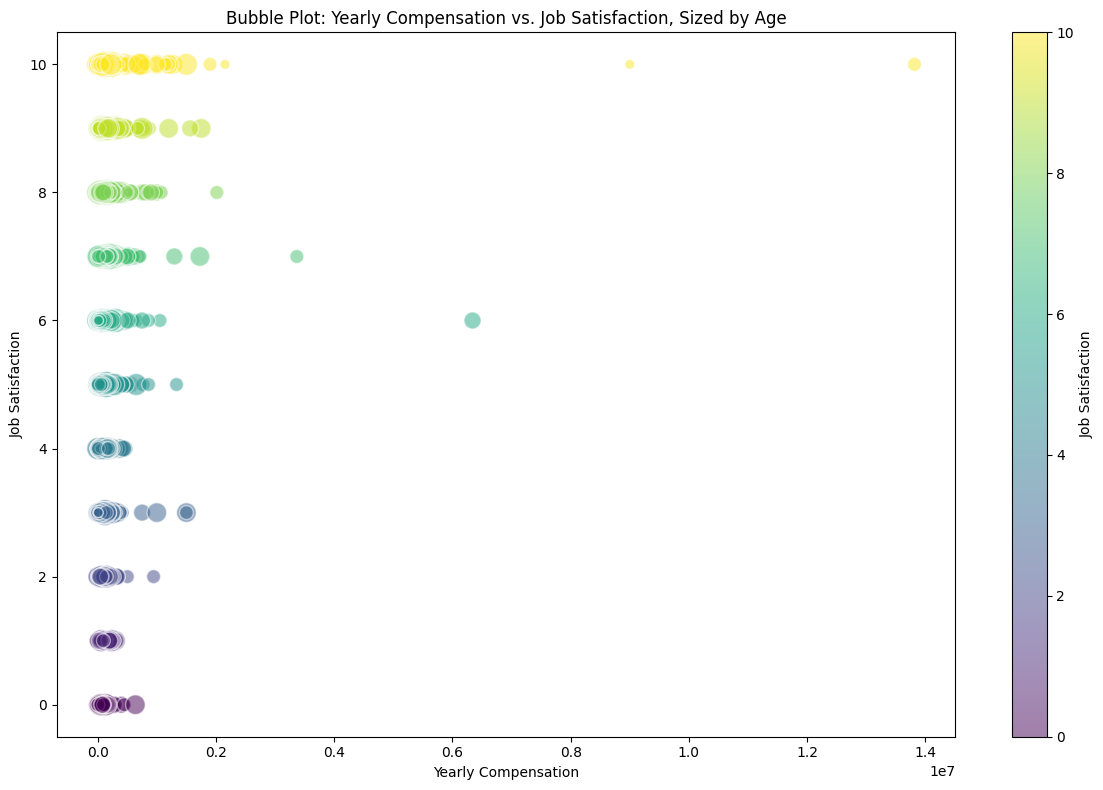

In [9]:
# Set up the figure for the bubble plot
plt.figure(figsize=(12, 8))

# Plot the bubble plot
plt.scatter(
    x=df['ConvertedCompYearly'],  # Yearly compensation on x-axis
    y=df['JobSat'],               # Job satisfaction on y-axis
    s=df['Age_numeric'] * 50,     # Bubble size based on age (scaled for visibility)
    alpha=0.5,                    # Transparency of bubbles
    c=df['JobSat'],               # Color by job satisfaction
    cmap='viridis',               # Color map
    edgecolors='w',               # White edges for the bubbles
)

# Add labels and title
plt.title('Bubble Plot: Yearly Compensation vs. Job Satisfaction, Sized by Age')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')

# Show a color bar representing Job Satisfaction
plt.colorbar(label='Job Satisfaction')

# Display the plot
plt.tight_layout()
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



In [10]:
##Write your code here
# Check the unique values in LanguageHaveWorkedWith (to understand its format)
print(df['LanguageHaveWorkedWith'].unique())

# Step 1: Clean the data by dropping rows with missing LanguageHaveWorkedWith
df = df.dropna(subset=['LanguageHaveWorkedWith'])

# Step 2: Split the 'LanguageHaveWorkedWith' column into individual languages
# Assuming LanguageHaveWorkedWith contains languages separated by commas (e.g., 'Python, Java, SQL')
languages_split = df['LanguageHaveWorkedWith'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Step 3: Create a DataFrame of languages with corresponding Age group
df_languages = pd.DataFrame({
    'Language': languages_split,
    'Age': df['Age'].repeat(languages_split.groupby(languages_split.index).size())
})

# Step 4: Count the frequency of each language per age group
language_counts = df_languages.groupby(['Age', 'Language']).size().reset_index(name='Count')

['Assembly;Bash/Shell (all shells);C;C++;HTML/CSS;Java;JavaScript;Python;R;SQL;TypeScript'
 'JavaScript;Julia;Python;SQL;TypeScript'
 'HTML/CSS;JavaScript;Python;SQL;TypeScript' ...
 'Bash/Shell (all shells);C;HTML/CSS;Java;JavaScript;PHP;SQL'
 'C#;HTML/CSS;Java;JavaScript;PHP;Python'
 'Assembly;C;C++;Java;Objective-C;PHP;SQL']


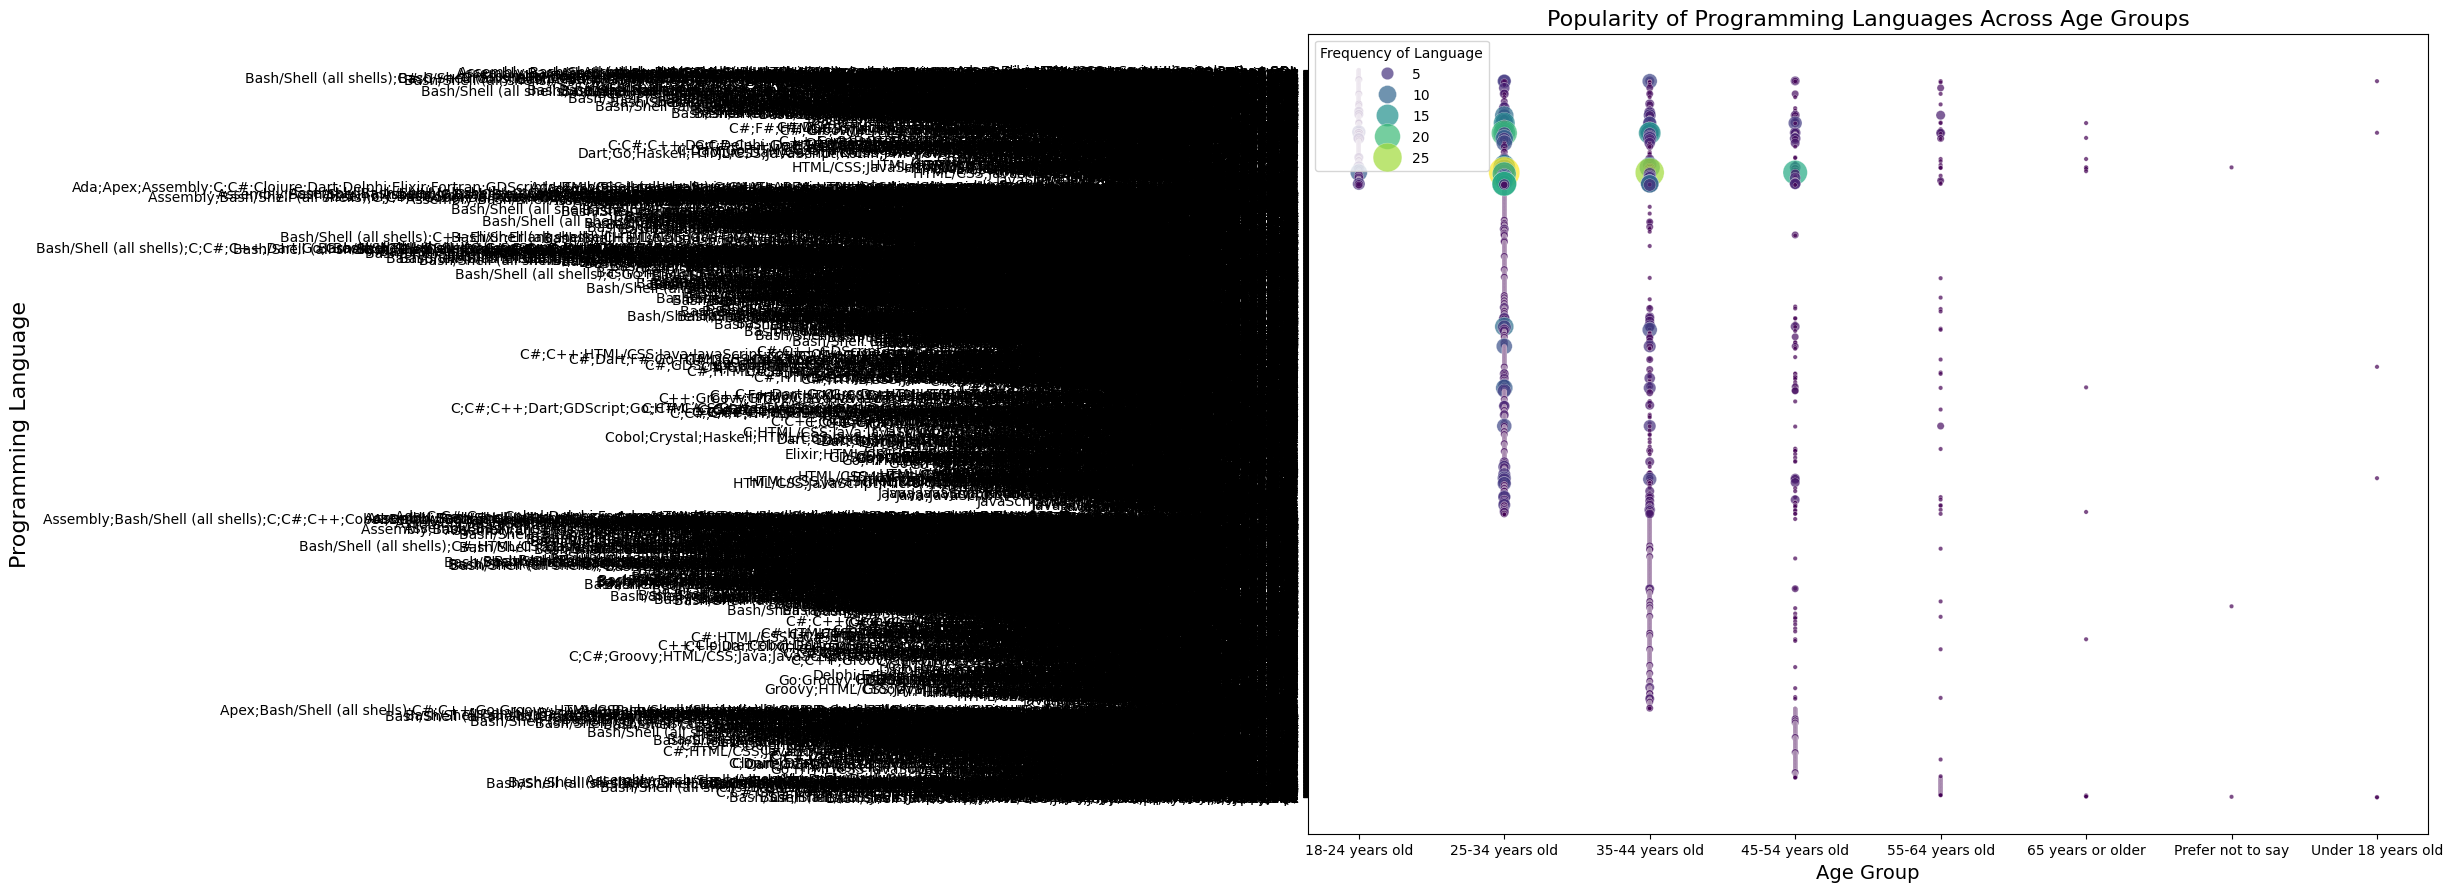

In [13]:
# Step 5: Set up the figure for the bubble plot
import seaborn as sns
plt.figure(figsize=(14, 10))

# Step 6: Plot the bubble plot
sns.scatterplot(
    data=language_counts,
    x='Age',  # Age groups on x-axis
    y='Language',  # Languages on y-axis
    size='Count',  # Bubble size based on the frequency of the language
    hue='Count',  # Color by frequency for better visualization
    sizes=(10, 500),  # Bubble size range
    palette='viridis',  # Color palette
    alpha=0.7,  # Transparency of bubbles
)

# Step 7: Add labels and title
plt.title('Popularity of Programming Languages Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Programming Language', fontsize=16)

# Add a legend for the bubble sizes
plt.legend(title='Frequency of Language', loc='upper left')

# Show the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


In [ ]:
##Write your code here

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [14]:
##Write your code here

# Step 1: Clean the data (remove rows with missing values in the relevant columns)
df_cleaned = df.dropna(subset=['DatabaseWantToWorkWith', 'JobSat'])

# Step 2: Split the 'DatabaseWantToWorkWith' column into individual databases
# Assuming DatabaseWantToWorkWith contains databases separated by commas (e.g., 'MySQL, PostgreSQL, SQLite')
databases_split = df_cleaned['DatabaseWantToWorkWith'].str.split(', ', expand=True).stack().reset_index(drop=True)

# Step 3: Create a DataFrame with each preferred database and corresponding job satisfaction
df_databases = pd.DataFrame({
    'Database': databases_split,
    'JobSat': df_cleaned['JobSat'].repeat(databases_split.groupby(databases_split.index).size())
})

# Step 4: Count the number of respondents for each database and job satisfaction level
database_counts = df_databases.groupby(['JobSat', 'Database']).size().reset_index(name='Count')

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


In [ ]:
##Write your code here

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
##Write your code here

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
